In [36]:
#underfitting의 발생 원인
#모델이 너무 단순, 규제가 너무 많음, 충분히 오래 훈련하지 않은 경우
#overfitting을 막는 방법: 더 많은 훈련 데이터 사용, 규제(regularization)(ex) 가중치 규제, 드롭아웃)

In [37]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [38]:
#download IMDB dataset
#multi-hot encoding
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = NUM_WORDS)

#multi-hot encoding: 정수 시퀀스를 0과 1로 이루어진 벡터로 변환
def multi_hot_sequences(sequences, dimension):
  #0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만든다.
  results = np.zeros((len(sequences), dimension))
  #특정 index만 1로 채워준다
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0
  return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

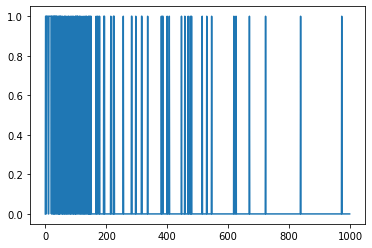

In [39]:
plt.plot(train_data[0])

In [40]:
#과대적합을 막는 가장 간단한 방법: 모델의 규모를 축소하는 것
#하지만 이는 공식이 없기 때문에 알맞은 모델의 크기를 찾기 위해
#비교적 적은 수의 층과 파라미터로 시작해서 검증 손실이 감소할 때까지 새로운 층을 추가 or 층의 크기를 늘림

#기준 모델 만들기
baseline_model = keras.Sequential([
  keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                16016     
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [41]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.5796 - accuracy: 0.7036 - binary_crossentropy: 0.5796 - val_loss: 0.4390 - val_accuracy: 0.8145 - val_binary_crossentropy: 0.4390 - 1s/epoch - 22ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3758 - accuracy: 0.8412 - binary_crossentropy: 0.3758 - val_loss: 0.3507 - val_accuracy: 0.8529 - val_binary_crossentropy: 0.3507 - 411ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3270 - accuracy: 0.8644 - binary_crossentropy: 0.3270 - val_loss: 0.3329 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3329 - 400ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3148 - accuracy: 0.8701 - binary_crossentropy: 0.3148 - val_loss: 0.3326 - val_accuracy: 0.8603 - val_binary_crossentropy: 0.3326 - 376ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3044 - accuracy: 0.8741 - binary_crossentropy: 0.3044 - val_loss: 0.3288 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3288 - 391ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3017 - accuracy: 0.8755 - binary_cr

In [42]:
#작은 모델 만들기 (기준 모델보다 적은 수의 은닉 유닛을 가진 모델)
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 4)                 4004      
                                                                 
 dense_31 (Dense)            (None, 4)                 20        
                                                                 
 dense_32 (Dense)            (None, 1)                 5         
                                                                 
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [43]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6294 - accuracy: 0.6567 - binary_crossentropy: 0.6294 - val_loss: 0.5404 - val_accuracy: 0.7842 - val_binary_crossentropy: 0.5404 - 1s/epoch - 22ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4688 - accuracy: 0.8155 - binary_crossentropy: 0.4688 - val_loss: 0.4185 - val_accuracy: 0.8384 - val_binary_crossentropy: 0.4185 - 318ms/epoch - 6ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3802 - accuracy: 0.8505 - binary_crossentropy: 0.3802 - val_loss: 0.3672 - val_accuracy: 0.8512 - val_binary_crossentropy: 0.3672 - 339ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3426 - accuracy: 0.8602 - binary_crossentropy: 0.3426 - val_loss: 0.3447 - val_accuracy: 0.8576 - val_binary_crossentropy: 0.3447 - 360ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3239 - accuracy: 0.8680 - binary_crossentropy: 0.3239 - val_loss: 0.3376 - val_accuracy: 0.8593 - val_binary_crossentropy: 0.3376 - 352ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3142 - accuracy: 0.8701 - binary_cr

In [44]:
#큰 모델 만들기 (얼마나 빠르게 overfitting되는지 알아보자)
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=([NUM_WORDS,])),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 512)               512512    
                                                                 
 dense_34 (Dense)            (None, 512)               262656    
                                                                 
 dense_35 (Dense)            (None, 1)                 513       
                                                                 
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [45]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.4128 - accuracy: 0.8106 - binary_crossentropy: 0.4128 - val_loss: 0.3328 - val_accuracy: 0.8586 - val_binary_crossentropy: 0.3328 - 3s/epoch - 69ms/step
Epoch 2/20
49/49 - 3s - loss: 0.2901 - accuracy: 0.8805 - binary_crossentropy: 0.2901 - val_loss: 0.3266 - val_accuracy: 0.8589 - val_binary_crossentropy: 0.3266 - 3s/epoch - 52ms/step
Epoch 3/20
49/49 - 3s - loss: 0.2240 - accuracy: 0.9110 - binary_crossentropy: 0.2240 - val_loss: 0.3408 - val_accuracy: 0.8566 - val_binary_crossentropy: 0.3408 - 3s/epoch - 53ms/step
Epoch 4/20
49/49 - 3s - loss: 0.1080 - accuracy: 0.9676 - binary_crossentropy: 0.1080 - val_loss: 0.4291 - val_accuracy: 0.8488 - val_binary_crossentropy: 0.4291 - 3s/epoch - 53ms/step
Epoch 5/20
49/49 - 3s - loss: 0.0275 - accuracy: 0.9948 - binary_crossentropy: 0.0275 - val_loss: 0.5409 - val_accuracy: 0.8488 - val_binary_crossentropy: 0.5409 - 3s/epoch - 59ms/step
Epoch 6/20
49/49 - 3s - loss: 0.0054 - accuracy: 0.9997 - binary_crossentro

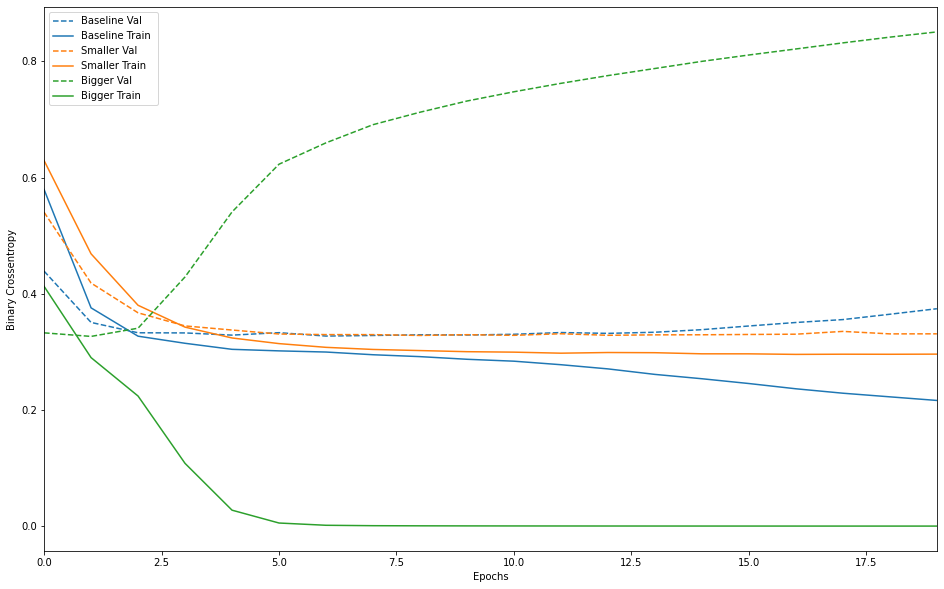

In [46]:
#training loss와 validation loss 그래프 그리기
#validation loss가 낮을수록 좋은 모델

def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title() + ' Val') #'--' : 점섬으로 나타내겠다 / name.title() : Baseline, Smaller, Bigger
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title() + ' Train ')
  
  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0, max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)]) 

# overfitting 시작되는 epoch 비교
####baseline: 4
####smaller: 6
####bigger: 1

In [47]:
#overfitting 방지 전략
#가중치 규제하기 : L1규제와 L2규제 두 가지가 있는데 보통 L2를 더 많이 사용한다(왜냐하면, L2규제는 가중치 파라미터를 제한하지만 완전히 0으로 만들지는 않기 때문이다.)

#그러므로, L2규제를 사용해보자
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6222 - accuracy: 0.7234 - binary_crossentropy: 0.5789 - val_loss: 0.4857 - val_accuracy: 0.8215 - val_binary_crossentropy: 0.4443 - 1s/epoch - 25ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4193 - accuracy: 0.8479 - binary_crossentropy: 0.3777 - val_loss: 0.3910 - val_accuracy: 0.8535 - val_binary_crossentropy: 0.3495 - 404ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3695 - accuracy: 0.8633 - binary_crossentropy: 0.3285 - val_loss: 0.3714 - val_accuracy: 0.8597 - val_binary_crossentropy: 0.3313 - 334ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3508 - accuracy: 0.8710 - binary_crossentropy: 0.3117 - val_loss: 0.3703 - val_accuracy: 0.8572 - val_binary_crossentropy: 0.3324 - 376ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3444 - accuracy: 0.8736 - binary_crossentropy: 0.3074 - val_loss: 0.3680 - val_accuracy: 0.8584 - val_binary_crossentropy: 0.3320 - 385ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3410 - accuracy: 0.8748 - binary_cr

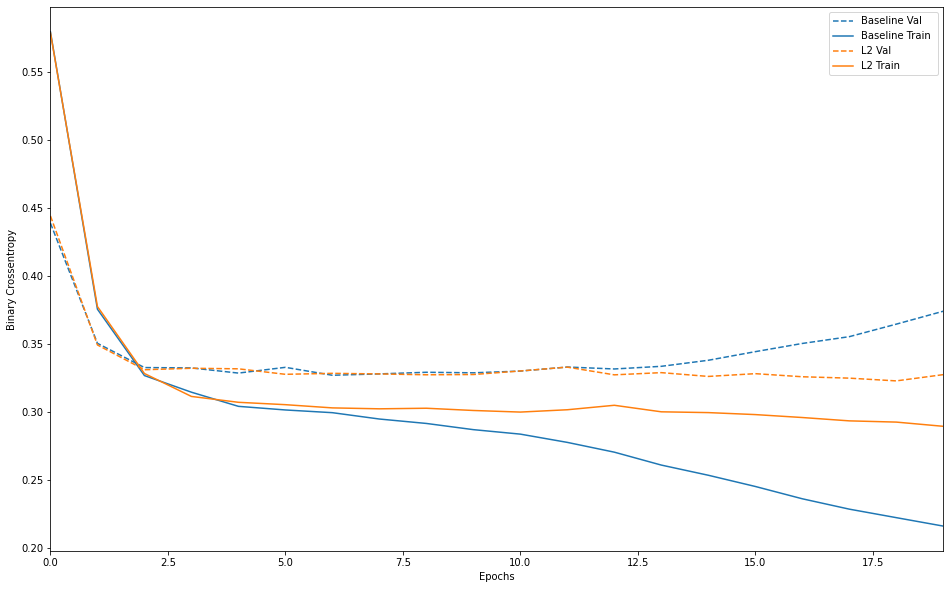

In [48]:
plot_history([('baseline', baseline_history), ('l2', l2_model_history)])

In [49]:
#overfitting 방지 전략
#dropout 추가하기 (신경망에서 갖아 효과적이고 널리 사용하느 규제 기법 중 하나)
#dropout 비율: 0이 되는 특성의 비율

dpt_model = keras.models.Sequential([
  keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6823 - accuracy: 0.5548 - binary_crossentropy: 0.6823 - val_loss: 0.6307 - val_accuracy: 0.7521 - val_binary_crossentropy: 0.6307 - 1s/epoch - 24ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6067 - accuracy: 0.6739 - binary_crossentropy: 0.6067 - val_loss: 0.5136 - val_accuracy: 0.8186 - val_binary_crossentropy: 0.5136 - 412ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5169 - accuracy: 0.7602 - binary_crossentropy: 0.5169 - val_loss: 0.4086 - val_accuracy: 0.8441 - val_binary_crossentropy: 0.4086 - 420ms/epoch - 9ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4493 - accuracy: 0.8068 - binary_crossentropy: 0.4493 - val_loss: 0.3611 - val_accuracy: 0.8536 - val_binary_crossentropy: 0.3611 - 428ms/epoch - 9ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4056 - accuracy: 0.8308 - binary_crossentropy: 0.4056 - val_loss: 0.3361 - val_accuracy: 0.8558 - val_binary_crossentropy: 0.3361 - 409ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3859 - accuracy: 0.8427 - binary_cr

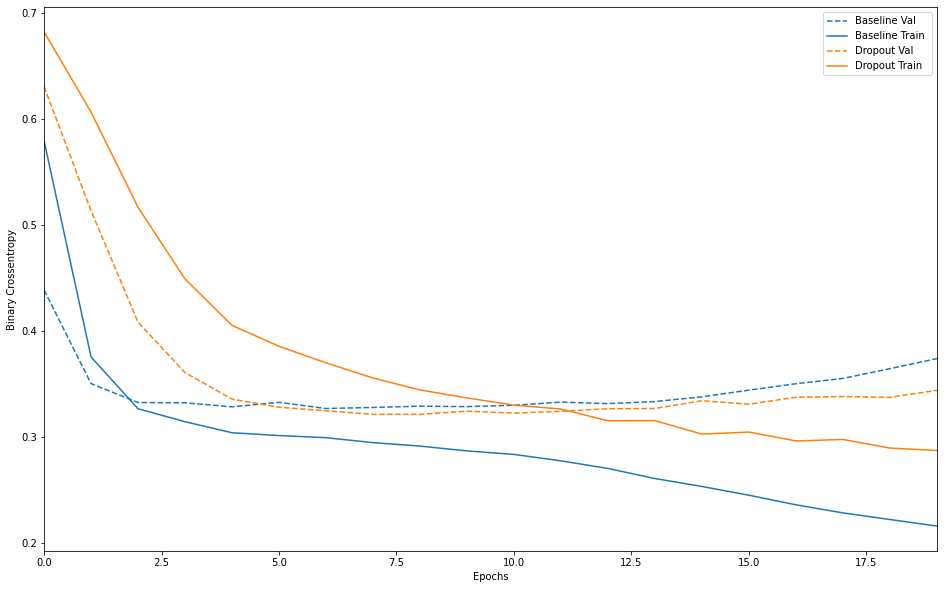

In [50]:
plot_history([('baseline', baseline_history), ('dropout', dpt_model_history)])

# [정리] 과대적합을 방지하는 방법
#### 더 많은 훈련 데이터를 모은다
#### 네트워크의 용량을 줄인다
#### 가중치 규제를 추가한다
#### 드롭아웃을 추가한다
#### p.s 데이터 증식, 배치 정규화